# MINIPROYECTO_1

###### ISMAEL GARCÍA ÍÑIGO
###### LOURDES
###### MIKEL AZPIROZ

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date 
import time
import datetime
from datetime import date, timedelta
import folium
from pandas import read_csv
import os
import webbrowser

In [2]:
#Cargamos los datos de las distintas tablas:
dfm = pd.read_csv("CoordMunicipios.csv", encoding = "ISO-8859-1")
dfe = pd.read_csv("CoordEstados.csv", encoding = "ISO-8859-1")
dfcovidm = pd.read_csv("200504COVID19MEXICO.csv", encoding = "ISO-8859-1")
dfcovidm.head(100)

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,04/05/2020,1ab4e5,2,3,25,2,25,25,6,2,...,2,1,2,2,2,1,99,MÃ©xico,99,2
1,04/05/2020,0cc140,2,3,15,1,28,15,20,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97
2,04/05/2020,0e0689,2,3,27,1,27,27,4,1,...,2,2,2,2,2,1,99,MÃ©xico,99,97
3,04/05/2020,1b81dc,2,3,2,1,8,2,4,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97
4,04/05/2020,0b7b4d,2,3,27,2,27,27,3,2,...,2,1,1,2,2,1,99,MÃ©xico,99,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,04/05/2020,0d78f9,2,4,9,1,9,15,58,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
96,04/05/2020,10ad30,2,4,9,1,20,15,121,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
97,04/05/2020,0dda30,2,4,15,1,9,15,106,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
98,04/05/2020,131f35,2,4,15,2,9,15,54,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97


In [3]:
for i in dfcovidm.columns:
    print(i)

FECHA_ACTUALIZACION
ID_REGISTRO
ORIGEN
SECTOR
ENTIDAD_UM
SEXO
ENTIDAD_NAC
ENTIDAD_RES
MUNICIPIO_RES
TIPO_PACIENTE
FECHA_INGRESO
FECHA_SINTOMAS
FECHA_DEF
INTUBADO
NEUMONIA
EDAD
NACIONALIDAD
EMBARAZO
HABLA_LENGUA_INDIG
DIABETES
EPOC
ASMA
INMUSUPR
HIPERTENSION
OTRA_COM
CARDIOVASCULAR
OBESIDAD
RENAL_CRONICA
TABAQUISMO
OTRO_CASO
RESULTADO
MIGRANTE
PAIS_NACIONALIDAD
PAIS_ORIGEN
UCI


In [4]:
dfcovidm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100041 entries, 0 to 100040
Data columns (total 35 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   FECHA_ACTUALIZACION  100041 non-null  object
 1   ID_REGISTRO          100041 non-null  object
 2   ORIGEN               100041 non-null  int64 
 3   SECTOR               100041 non-null  int64 
 4   ENTIDAD_UM           100041 non-null  int64 
 5   SEXO                 100041 non-null  int64 
 6   ENTIDAD_NAC          100041 non-null  int64 
 7   ENTIDAD_RES          100041 non-null  int64 
 8   MUNICIPIO_RES        100041 non-null  int64 
 9   TIPO_PACIENTE        100041 non-null  int64 
 10  FECHA_INGRESO        100041 non-null  object
 11  FECHA_SINTOMAS       100041 non-null  object
 12  FECHA_DEF            100041 non-null  object
 13  INTUBADO             100041 non-null  int64 
 14  NEUMONIA             100041 non-null  int64 
 15  EDAD                 100041 non-nu

In [5]:
dfcovidm.shape

(100041, 35)

In [6]:
dfm.shape

(2502, 7)

In [7]:
dfe.shape

(36, 5)

In [8]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2502 entries, 0 to 2501
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Clave Estado     2501 non-null   float64
 1   Estado           2501 non-null   object 
 2   Clave Municipio  2501 non-null   float64
 3   Municipio        2501 non-null   object 
 4   Latitud          2502 non-null   float64
 5   Longitud         2502 non-null   object 
 6   Error            0 non-null      float64
dtypes: float64(4), object(3)
memory usage: 137.0+ KB


In [9]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Clave Estado  36 non-null     int64 
 1   Estado        36 non-null     object
 2   Latitud       36 non-null     object
 3   Longitud      36 non-null     object
 4   Error         36 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.5+ KB


In [10]:
dfm

,Clave Estado,Estado,Clave Municipio,Municipio,Latitud,Longitud,Error
0,1.0,Aguascalientes,1.0,Aguascalientes,21.880655,-102.2961323,NaN
1,1.0,Aguascalientes,2.0,Asientos,22.132107,-102.0952559,NaN
2,1.0,Aguascalientes,3.0,Calvillo,21.846512,-102.7185731,NaN
3,1.0,Aguascalientes,4.0,Cosío,22.370515,-102.3120085,NaN
4,1.0,Aguascalientes,5.0,Jesús María,21.934555,-102.4684517,NaN
...,...,...,...,...,...,...,...
2497,32.0,Zacatecas,999.0,No Especificado,21.511359,-103.3705371,NaN
2498,36.0,Estados Unidos Mexicanos,999.0,No Especificado,23.000000,-103.0000001,NaN
2499,97.0,No Aplica,997.0,No Aplica,19.432630,-99.1331785,NaN
2500,NaN,NaN,NaN,NaN,19.251309,-100.0164818,NaN


In [11]:
dfe

,Clave Estado,Estado,Latitud,Longitud,Error
0,1,Aguascalientes,21.8818,-102.291,ok
1,2,Baja California,29.95,-115.116667,ok
2,3,Baja California Sur,25.625057,-111.700684,ok
3,4,Campeche,19.32920555,-89.94391483,ok
4,5,Coahuila De Zaragoza,27.32622,-102.163658,ok
5,6,Colima,19.24997,-103.72714,ok
6,7,Chiapas,16.5000001,-92.5000001,ok
7,8,Chihuahua,28.5000001,-106.0000001,ok
8,9,Ciudad De México,19.4326296,-99.1331785,ok
9,10,Durango,24.833333,-104.833333,ok


# PARTE 1:

### 1.	Hacer una descripción de los 3 dataframe (puede ser escrito o con números):

### a.	¿Número de columnas, número de filas?

###### -	Pacientes Covid (dfcovidm / 200504COVID19MEXICO.csv): 35 columnas y 100041 filas.
###### -	Municipios (dfm / CoordMunicipios.csv): 7 columnas y 2502 filas.
###### -	Estados (dfe / CoordEstados.csv): 5 columnas y 36 filas.


### b.	¿Cuántas columnas son categóricas y numéricas?

###### Son variables numéricas todas las que contienen un valor numérico, a excepción de las variables que contestan sí/no/se ignora/etc.  a través de números. Por ejemplo, ese es el caso de las columnas de la tabla de pacientes donde se informa si tienen o han tenido algún otro tipo de enfermedad, desde neumonía (columna 14) a dolencias renales (columna 27): 1 = SÍ / 2 = NO / 97 = NO APLICA / 98 = SE IGNORA / 99 = NO ESPECIFICADO.

### 2.	¿Cuáles son las columnas que consideras importantes del documento 200504COVID19MEXICO.csv y por qué? (crea una lista con esas columnas y la razón por que son importantes. Trata de investigar el significado de las columnas que desconozcas).

###### -	Datos básicos del paciente: edad, sexo, etc., 
###### -	Información geográfica: municipio y estado de residencia del paciente, ubicación de la unidad médica donde se trató al paciente, etc.
###### -	Factores de riesgo: tabaquismo, antecedentes médicos, otras enfermedades, etc.
###### -	Fechas: inicio de síntomas, ingreso hospitalario, defunción, etc.


### 3.	Después de revisar los 3 dataframe, encuentra mínimo 4 datos importantes que se podrían obtener a través del análisis de los datos.

###### -	Distribución por estados de la incidencia de contagios por coronavirus.
###### -	Relación entre la fecha de inicio de síntomas y la fecha de ingreso hospitalario.
###### -	Relación entre la existencia de diabetes e ingreso hospitalario.
###### -	Relación entre la edad e y el ingreso o no en la UCI.


### 4.	Encuentra mínimo 5 gráficas que podrías hacer con los datos y describe la razón de porque hacer esa gráfica y con qué variables.

###### -	Gráfica de barras con los 10 estados con más casos.
###### -	Gráfica de barras con los ingresados en UCI por estados.
###### -	Gráfica de densidad de contagiados por coronavirus con diabetes.
###### -	Correlación entre el ingreso en la UCI y otras patologías o antecedentes médicos.
###### -	Gráficas y mapas que analicen la distribución geográfica de los contagios por coronavirus, para detectar posibles focos de contagio.


### 5.	Plantea un objetivo relacionado a los puntos 3 y 4 que quieras lograr encontrando esa información y gráficos.

###### Por ejemplo, podríamos analizar la incidencia del SARS-COV2 y la Covid-19 entre diabéticos, viendo su distribución geográfica, la relación con otros infectados u otras enfermedades, el número de ingresos en UCI, la tasa de mortalidad, etc.

# PARTE 2:

### 1. Número de personas que han dado positivo:

###### Contamos el número de registros con valor 1 en la columna de "RESULTADO".  Son 24905 personas.

In [12]:
dfcovidm.RESULTADO.value_counts()

2    61993
1    24905
3    13143
Name: RESULTADO, dtype: int64

### 2. Número de personas que han dado negativo:

###### Contamos el número de registros con valor 2 en la columna de "RESULTADO". Son 61993 personas.

In [13]:
dfcovidm.RESULTADO.value_counts()

2    61993
1    24905
3    13143
Name: RESULTADO, dtype: int64

### 3. Número de personas en UCI:

###### Contamos el número de registros con valor 1 en la columna de "UCI". Son 2250 personas.

In [14]:
dfcovidm.UCI.value_counts()


97    73210
2     24554
1      2250
99       27
Name: UCI, dtype: int64

### 4. Número de personas que han fallecido:

###### Contando los distintos valores de la columna de la fecha de defunción (FECHA_DEF), observamos que en el caso de aquellos que no han muerto aparece la fecha 9999-99-99. Por lo tanto, la suma del resto de registros nos daría el número de fallecidos.

In [15]:
dfcovidm.FECHA_DEF.value_counts()

9999-99-99    96461
25/04/2020      157
26/04/2020      151
24/04/2020      149
21/04/2020      149
23/04/2020      139
22/04/2020      135
19/04/2020      133
20/04/2020      132
27/04/2020      128
28/04/2020      123
29/04/2020      121
14/04/2020      115
15/04/2020      110
16/04/2020      109
10/04/2020      107
18/04/2020      105
17/04/2020      102
11/04/2020      101
12/04/2020       98
13/04/2020       97
02/05/2020       96
07/04/2020       96
30/04/2020       92
01/05/2020       88
09/04/2020       86
06/04/2020       75
08/04/2020       72
04/04/2020       57
31/03/2020       55
03/04/2020       51
02/04/2020       51
05/04/2020       51
03/05/2020       47
01/04/2020       43
30/03/2020       38
28/03/2020       25
29/03/2020       24
27/03/2020       20
26/03/2020       17
04/05/2020        7
24/03/2020        5
25/03/2020        4
18/03/2020        3
22/03/2020        3
16/03/2020        2
23/03/2020        2
20/03/2020        1
04/03/2020        1
15/01/2020        1


###### Si aplicamos un filtro excuyendo aquellos con "FECHA_DEF" = "9999-99-99", obtenemos la tabla de las personas fallecidas. El número de filas nos indica que han fallecido 3580 personas.

In [16]:
dfcovidm[~(dfcovidm["FECHA_DEF"]=="9999-99-99")]

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,04/05/2020,1ab4e5,2,3,25,2,25,25,6,2,...,2,1,2,2,2,1,99,MÃ©xico,99,2
4,04/05/2020,0b7b4d,2,3,27,2,27,27,3,2,...,2,1,1,2,2,1,99,MÃ©xico,99,2
5,04/05/2020,1448c7,2,3,25,2,99,25,6,2,...,2,2,2,2,2,1,2,Estados Unidos de AmÃ©rica,99,2
19,04/05/2020,17aa22,2,4,23,2,8,23,5,2,...,2,1,2,2,99,1,99,MÃ©xico,99,2
31,04/05/2020,032c9a,2,3,25,2,25,25,6,2,...,2,2,2,2,2,1,99,MÃ©xico,99,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99818,04/05/2020,0b6536,1,4,9,2,9,9,2,2,...,2,2,2,2,99,3,99,MÃ©xico,99,2
99823,04/05/2020,1a9205,1,4,30,1,30,30,131,2,...,2,2,2,2,99,3,99,MÃ©xico,99,2
99846,04/05/2020,05330d,1,4,5,2,5,5,35,2,...,2,2,2,2,99,3,99,MÃ©xico,99,2
99964,04/05/2020,14aa05,1,12,2,1,2,2,4,2,...,98,98,98,98,99,3,99,MÃ©xico,99,2


### 5. Número de personas que han dado positivo y sin enfermedades:

In [17]:
# En primer lugar, obtenemos el listado de positivos:

dfcovidm[dfcovidm.RESULTADO==1]


,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,04/05/2020,1ab4e5,2,3,25,2,25,25,6,2,...,2,1,2,2,2,1,99,MÃ©xico,99,2
1,04/05/2020,0cc140,2,3,15,1,28,15,20,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97
2,04/05/2020,0e0689,2,3,27,1,27,27,4,1,...,2,2,2,2,2,1,99,MÃ©xico,99,97
3,04/05/2020,1b81dc,2,3,2,1,8,2,4,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97
4,04/05/2020,0b7b4d,2,3,27,2,27,27,3,2,...,2,1,1,2,2,1,99,MÃ©xico,99,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30941,04/05/2020,146b5b,1,13,21,1,15,21,114,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97
30942,04/05/2020,1ca23c,1,13,21,1,15,21,114,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97
30943,04/05/2020,19adbb,1,13,19,1,19,19,39,1,...,2,2,2,2,2,1,99,MÃ©xico,99,97
30944,04/05/2020,0e7853,1,13,21,1,21,21,85,2,...,2,1,2,2,2,1,99,MÃ©xico,99,2


In [18]:
# Posteriormente, creamos una nueva tabla (positivos_sin) para ver si los positivos tenían enfermedades previas (1) o no (2).

# Nota: Hemos considerado que el tabaquismo no es una enfermedad.

positivos_sin=dfcovidm[dfcovidm['RESULTADO']==1].iloc[:,19:28]
positivos_sin


,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA
0,1,2,2,2,1,2,2,1,2
1,2,2,2,2,1,2,2,2,2
2,2,2,2,2,2,2,2,2,2
3,2,2,2,2,2,2,2,2,2
4,2,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...
30941,2,2,2,2,2,2,2,2,2
30942,2,2,2,2,2,2,2,2,2
30943,2,2,2,2,2,2,2,2,2
30944,2,2,2,2,1,2,2,1,2


In [19]:
# Utilizando la tabla anterior, sumamos los valores de las columnas de enfermedados por cada positivo.

# Si la suma de valores de enfermedades previas da 18, significa que los positivos NO tenían ninguna enfermedad anterior.

positivos_sin.sum(axis=1)


0        15
1        17
2        18
3        18
4        15
         ..
30941    18
30942    18
30943    18
30944    16
30945    18
Length: 24905, dtype: int64

In [20]:
# En el dataframe "positivos_sin", añadimos una nueva columna llamada "enfermedad", donde se indica si los positivos tenían antecedentes (con enfermedad) o no (sin enfermedad):

positivos_sin['enfermedad']=['Sin enfermedad'if i==18 else 'Con enfermedad' for i in positivos_sin.sum(axis=1)]
positivos_sin


,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,enfermedad
0,1,2,2,2,1,2,2,1,2,Con enfermedad
1,2,2,2,2,1,2,2,2,2,Con enfermedad
2,2,2,2,2,2,2,2,2,2,Sin enfermedad
3,2,2,2,2,2,2,2,2,2,Sin enfermedad
4,2,2,2,2,1,2,2,1,1,Con enfermedad
...,...,...,...,...,...,...,...,...,...,...
30941,2,2,2,2,2,2,2,2,2,Sin enfermedad
30942,2,2,2,2,2,2,2,2,2,Sin enfermedad
30943,2,2,2,2,2,2,2,2,2,Sin enfermedad
30944,2,2,2,2,1,2,2,1,2,Con enfermedad


In [21]:
# Cálculo de positivos que tenían antecedentes médicos: 12260 personas.

positivos_sin['enfermedad'].value_counts()


Sin enfermedad    12645
Con enfermedad    12260
Name: enfermedad, dtype: int64

### 6. Número de personas que han fallecido (que han dado positivo) y sin enfermedades:

In [22]:
# Primero creamos un dataframe llamado "positivos" con las personas que han dado positivo:

positivos=dfcovidm[dfcovidm["RESULTADO"]==1].copy()

# Después añadimos a dicho dataframe la columna "ENFERMEDAD", la cual indica si el positivo tenía antecedentes o no, copiándola del dataframe "positivos_sin"

positivos["ENFERMEDAD"]=positivos_sin['enfermedad']

# Finalmente, filtramos aquellos positivos que no tuvieran otras enfermedades y que hubieran fallecido (por lo que tienen una fecha de defunción distinta a 9999-99-99).
# El número de filas nos indica la cantidad de positivos en coronavirus que han fallecido sin tener enfermedades previas: 541 personas. 

positivos[(positivos["ENFERMEDAD"]=="Sin enfermedad")&(positivos["FECHA_DEF"]!="9999-99-99")]


,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,ENFERMEDAD
5,04/05/2020,1448c7,2,3,25,2,99,25,6,2,...,2,2,2,2,1,2,Estados Unidos de AmÃ©rica,99,2,Sin enfermedad
62,04/05/2020,62045,2,3,27,1,27,27,4,2,...,2,2,2,1,1,99,MÃ©xico,99,2,Sin enfermedad
63,04/05/2020,0a572b,2,3,25,2,10,25,6,2,...,2,2,2,99,1,99,MÃ©xico,99,2,Sin enfermedad
81,04/05/2020,142caf,2,4,9,2,20,9,16,2,...,2,2,2,99,1,99,MÃ©xico,99,2,Sin enfermedad
117,04/05/2020,17eb77,2,3,25,2,25,25,6,2,...,2,2,2,99,1,99,MÃ©xico,99,2,Sin enfermedad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24527,04/05/2020,0e48ae,1,12,23,2,31,23,5,2,...,2,2,2,2,1,99,MÃ©xico,99,2,Sin enfermedad
24534,04/05/2020,0a79cb,1,12,12,2,12,12,59,2,...,2,2,2,2,1,99,MÃ©xico,99,2,Sin enfermedad
24540,04/05/2020,14ff67,1,12,27,2,27,27,4,2,...,2,2,2,2,1,99,MÃ©xico,99,2,Sin enfermedad
24640,04/05/2020,0a590f,1,12,9,1,20,9,7,2,...,2,2,2,2,1,99,MÃ©xico,99,2,Sin enfermedad


### 7. Tiempo promedio entre la fecha de síntomas y la fecha de defunción de los que han dado positivo:

In [23]:
# En primer lugar, obtenemos 2 listas. Una con las fechas de inicio de los síntomas de los positivos fallecidos y otra con sus fechas de defunción.

df1=dfcovidm.copy()
pos=df1[df1['RESULTADO']==1]
fal=pos[~(pos['FECHA_DEF']=='9999-99-99')]
fecha_sintomas=list(fal.FECHA_SINTOMAS)
fecha_muerte=list(fal.FECHA_DEF)

# Posteriormente, iteramos a través de ambas listas para sacar otro lista con las diferencias entre la fecha inicial de síntomas y la fechas de defunción de los positivos fallecidos.

fecha_muerte_objeto=[]
fecha_sintomas_objeto=[]
diferencia=[]
for i in range(len(fecha_muerte)):
    fecha_muerte_objeto.append(datetime.datetime.strptime(fecha_muerte[i], '%d/%m/%Y'))
    for j in range(len(fecha_sintomas)):
        fecha_sintomas_objeto.append(datetime.datetime.strptime(fecha_sintomas[j], '%d/%m/%Y'))
        diferencia.append(fecha_muerte_objeto[i]-fecha_sintomas_objeto[j])

# Finalmente, calculamos la diferencia media y nos sale que el tiempo promedio transcurrido entre los síntomas iniciales de los fallecidos positivos y su muerte es de 10 días, 13245 segundos y 462555 microsegundos.

media=np.array(diferencia).mean()
media

datetime.timedelta(days=10, seconds=13245, microseconds=462555)

### 8.	¿Cuál es la enfermedad con más prevalencia en los pacientes que dan positivo?

In [24]:
# En primer lugar, partiendo del dataframe que engloba a todos los positivos y las posibles enfermedades previas ("positivos_sin"), reemplazamos los valores 97 (NO SE APLICA) por 0:

a=positivos_sin.apply(lambda x: x.replace(97,0))

# Después, hacemos lo mismo con los valores 98 (SE IGNORA) y 99 (NO ESPECIFICADO):

a1=a.apply(lambda x: x.replace(98,0))
a2=a1.apply(lambda x: x.replace(99,0))

# Borramos la columna de "enfermedad" de la tabla "a2", ya que no la necesitamos:

del a2["enfermedad"]

# Sumamos los valores de cada columna de enfermedades de la tabla a2:

a2.sum()


DIABETES          44659
EPOC              48708
ASMA              48476
INMUSUPR          48867
HIPERTENSION      43876
OTRA_COM          48261
CARDIOVASCULAR    48588
OBESIDAD          44070
RENAL_CRONICA     48678
dtype: int64

In [25]:
# Sacando el valor mínimo entre las sumas anteriores, obtenemos la enfermedad con más prevalencia.

# En este caso, se trata de la hipertensión.

minimo=a2.sum().min()
minimo


43876

### 9.	¿Cuál es la enfermedad con menor prevalencia en los pacientes que dan positivo?

In [26]:
# En primer lugar, partiendo del dataframe que engloba a todos los positivos y las posibles enfermedades previas ("positivos_sin"), reemplazamos los valores 97 (NO SE APLICA) por 0:

a=positivos_sin.apply(lambda x: x.replace(97,0))

# Posteriormente, hacemos lo mismo con los valores 98 (SE IGNORA) y 99 (NO ESPECIFICADO):

a1=a.apply(lambda x: x.replace(98,0))
a2=a1.apply(lambda x: x.replace(99,0))

# Borramos la columna de "enfermedad" de la tabla "a2", ya que no la necesitamos:

del a2["enfermedad"]

# Sumamos los valores de cada columna de enfermedades de la tabla a2:

a2.sum()



DIABETES          44659
EPOC              48708
ASMA              48476
INMUSUPR          48867
HIPERTENSION      43876
OTRA_COM          48261
CARDIOVASCULAR    48588
OBESIDAD          44070
RENAL_CRONICA     48678
dtype: int64

In [27]:
# Buscando el valor máximo entre las sumas anteriores, obtenemos la enfermedad con menos prevalencia entre los positivos en coronavirus.

# En este caso, se trata de la inmunodeficiencia.

maximo=a2.sum().max()
maximo


48867

### 10.	¿Es la misma cantidad de pacientes entubados que los que se encuentran en UCI?

###### Tras contar los valores de las columnas correspondientes, observamos que hay 2250 pacientes en UCI y 2001 pacientes intubados, por lo que la cantidad de pacientes intubados es menor que la de ingresados en la UCI.

In [28]:
dfcovidm["INTUBADO"].value_counts()

97    73210
2     24804
1      2001
99       26
Name: INTUBADO, dtype: int64

In [29]:
dfcovidm["UCI"].value_counts()

97    73210
2     24554
1      2250
99       27
Name: UCI, dtype: int64

# GRÁFICAS Y MAPAS:

### 1.	Número de personas que dan positivo por estado:

In [30]:
# Cambiamos el nombre de la columna donde se indica la clave del estado de cada paciente de la tabla principal ("Clave Estado" en vez de "ENTIDAD NAC"), para que coincida con la denominación de esa variable en la tabla de los estados.
# De esta manera, podremos unir ambos dataframes.

dfcovidm=dfcovidm.rename(columns={"ENTIDAD_NAC":'Clave Estado'})
dfcovidm


,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,Clave Estado,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,04/05/2020,1ab4e5,2,3,25,2,25,25,6,2,...,2,1,2,2,2,1,99,MÃ©xico,99,2
1,04/05/2020,0cc140,2,3,15,1,28,15,20,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97
2,04/05/2020,0e0689,2,3,27,1,27,27,4,1,...,2,2,2,2,2,1,99,MÃ©xico,99,97
3,04/05/2020,1b81dc,2,3,2,1,8,2,4,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97
4,04/05/2020,0b7b4d,2,3,27,2,27,27,3,2,...,2,1,1,2,2,1,99,MÃ©xico,99,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100036,04/05/2020,1ce1b9,1,12,9,1,9,9,5,2,...,2,2,2,2,2,3,99,MÃ©xico,99,1
100037,04/05/2020,0f2dd8,1,13,21,1,21,21,74,1,...,2,2,2,2,2,3,99,MÃ©xico,99,97
100038,04/05/2020,02995d,1,13,21,1,15,21,114,1,...,2,1,2,2,1,3,99,MÃ©xico,99,97
100039,04/05/2020,048b5f,1,13,21,1,15,21,114,2,...,2,1,2,1,1,3,99,MÃ©xico,99,2


In [31]:
# Habilitamos la función merge y unimos el dataframe principal (dfcovidm) con el de los estados (dfe):

pd.merge(dfcovidm,dfe,on='Clave Estado')


,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,Clave Estado,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,Estado,Latitud,Longitud,Error
0,04/05/2020,1ab4e5,2,3,25,2,25,25,6,2,...,2,1,99,MÃ©xico,99,2,Sinaloa,25.0000001,-107.5000001,ok
1,04/05/2020,73442,2,3,25,1,25,25,6,2,...,2,1,99,MÃ©xico,99,2,Sinaloa,25.0000001,-107.5000001,ok
2,04/05/2020,07eb77,2,3,25,2,25,25,6,2,...,99,1,99,MÃ©xico,99,2,Sinaloa,25.0000001,-107.5000001,ok
3,04/05/2020,032c9a,2,3,25,2,25,25,6,2,...,2,1,99,MÃ©xico,99,2,Sinaloa,25.0000001,-107.5000001,ok
4,04/05/2020,144da4,2,3,25,1,25,25,6,2,...,2,1,99,MÃ©xico,99,1,Sinaloa,25.0000001,-107.5000001,ok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100036,04/05/2020,04f11d,2,12,24,1,24,24,28,1,...,2,3,99,MÃ©xico,99,97,San Luis Potosí,22.549968,-100.28235,ok
100037,04/05/2020,07a1c9,1,4,24,1,24,24,28,2,...,99,3,99,MÃ©xico,99,2,San Luis Potosí,22.549968,-100.28235,ok
100038,04/05/2020,112615,1,99,24,2,24,24,37,2,...,99,3,99,MÃ©xico,99,2,San Luis Potosí,22.549968,-100.28235,ok
100039,04/05/2020,1a13e8,1,12,19,1,24,19,31,1,...,1,3,99,MÃ©xico,99,97,San Luis Potosí,22.549968,-100.28235,ok


In [32]:
# Filtramos los positivos por estado:

dfcovidm[dfcovidm['RESULTADO']==1]['Clave Estado']


0        25
1        28
2        27
3         8
4        27
         ..
30941    15
30942    15
30943    19
30944    21
30945    21
Name: Clave Estado, Length: 24905, dtype: int64

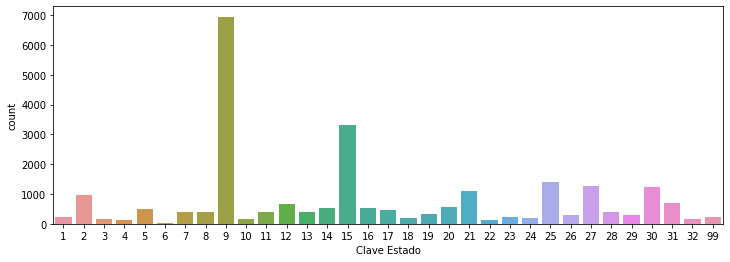

In [33]:
# Hacemos una gráfica de barras donde se representa número de positivos por estado.
# Vemos que destacan la Ciudad de México (clave 9) en primer lugar y el Estado de México (15) en segunda posición.

fig, ax = plt.subplots(figsize=(12,4))
sns.countplot(dfcovidm[dfcovidm['RESULTADO']==1]['Clave Estado'])
plt.show()

###### A continuación, volvemos a hacer el mismo gráfico excluyendo a los positivos para los que no se ha indicado el estado (99).

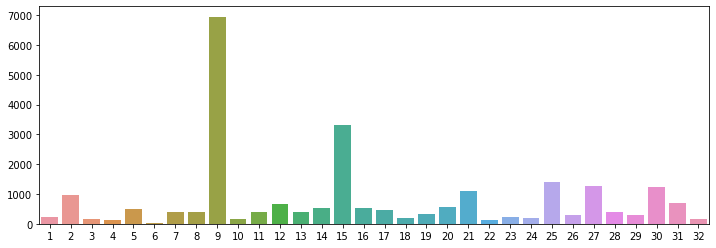

In [34]:
df1=dfcovidm.copy()
a=df1[df1['RESULTADO']==1]['Clave Estado'].value_counts().sort_index()
a=a.drop([99],axis=0)
positivos_estado=dict(a)
estado=list(positivos_estado.keys())
positivos=list(positivos_estado.values())
fig, ax = plt.subplots(figsize=(12,4))
sns.barplot(estado,positivos)
plt.show()

### 2. Número de personas que dan negativo por estado:

###### Volvemos a hacer un gráfico de barras donde se representan los distintos estados en función del número de personas que han dado negativo en coronavirus. Al igual que con los positivos, se sitúa en primer lugar la Ciudad de México, destacando claramente sobre el resto.

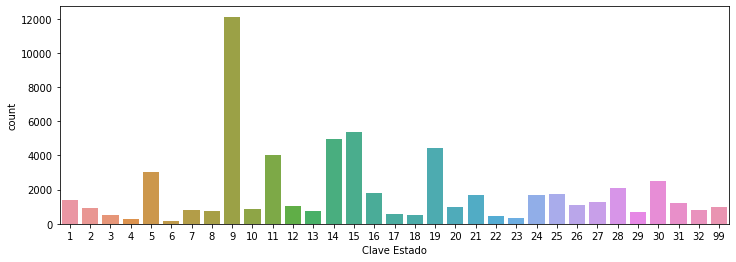

In [35]:
fig, ax = plt.subplots(figsize=(12,4))
sns.countplot(dfcovidm[dfcovidm['RESULTADO']==2]['Clave Estado'])
plt.show()


###### A continuación, volvemos a hacer el mismo gráfico eliminado los negativos para los que no se ha indicado el estado (99).

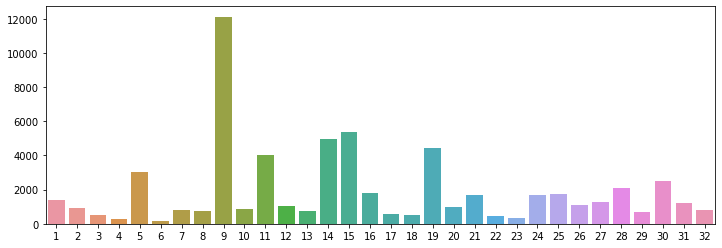

In [36]:
df1=dfcovidm.copy()
a=df1[df1['RESULTADO']==2]['Clave Estado'].value_counts().sort_index()
a=a.drop([99],axis=0)
positivos_estado=dict(a)
estado=list(positivos_estado.keys())
positivos=list(positivos_estado.values())
fig, ax = plt.subplots(figsize=(12,4))
sns.barplot(estado,positivos)
plt.show()

### 3. El municipio de cada estado con más positivos:

###### Hacemos una gráfica donde cada barra nos muestra la cantidad de contagios del municipio con más positivos en cada uno de  los estados de México (excluyendo los pacientes de los que no tengamos dicha información).

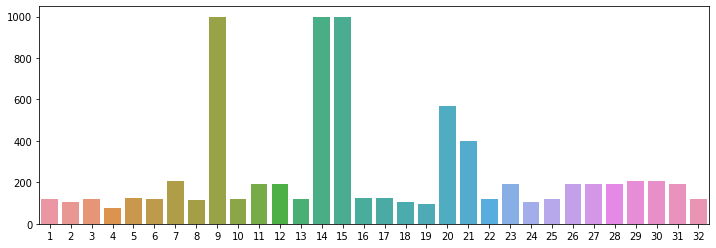

In [37]:
a=dfcovidm[dfcovidm.RESULTADO==1]
b=a.groupby('Clave Estado')['MUNICIPIO_RES'].max().sort_values(ascending=False)
b=b.drop([99],axis=0)
positivos_muni=dict(b)
estado=list(positivos_muni.keys())
positivosm=list(positivos_muni.values())
fig, ax = plt.subplots(figsize=(12,4))
sns.barplot(estado,positivosm)
plt.show()

### 4.	Distribución de las edades que han dado positivo entre hombres y mujeres:

###### Hacemos un histograma donde se represente la distribución de los contagios por coronavirus por franjas de edad, diferenciando entre hombres y mujeres.

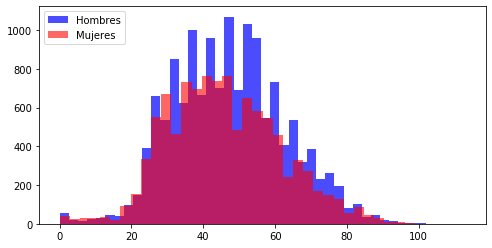

In [38]:
positivos=dfcovidm[dfcovidm['RESULTADO']==1]
positivosh=positivos[positivos['SEXO']==2].EDAD.sort_values()
positivosm=positivos[positivos['SEXO']==1].EDAD.sort_values()
fig, ax = plt.subplots(figsize=(8,4))
plt.hist(positivosh, bins=40, alpha=0.7,color="Blue")
plt.hist(positivosm, bins=40, alpha=0.6,color="Red")
ax.legend(['Hombres','Mujeres'],loc=2)
plt.show()

### 5.	Distribución de las edades que han dado negativo entre hombres y mujeres:

###### Hacemos un histograma donde se represente la distribución por franjas de edad de las personas que han dado negativo en los tests de coronavirus, diferenciando entre hombres y mujeres.

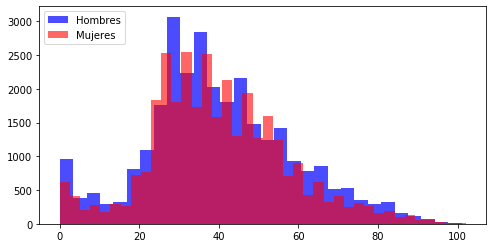

In [39]:
negativo=dfcovidm[dfcovidm['RESULTADO']==2]
negativoh=negativo[negativo['SEXO']==2].EDAD.sort_values()
negativom=negativo[negativo['SEXO']==1].EDAD.sort_values()
fig, ax = plt.subplots(figsize=(8,4))
plt.hist(negativoh, bins=30, alpha=0.7,color="Blue")
plt.hist(negativom,bins=40, alpha=0.6,color="Red")
ax.legend(['Hombres','Mujeres'],loc=2)
plt.show()

### 6.	Distribución de las personas que han fallecido entre hombres y mujeres:

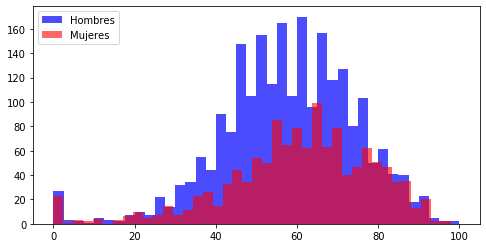

In [40]:
fallecidos=dfcovidm[~(dfcovidm['FECHA_DEF']=='9999-99-99')]
fallecidosh=fallecidos[fallecidos['SEXO']==2].EDAD.sort_values()
fallecidosm=fallecidos[fallecidos['SEXO']==1].EDAD.sort_values()
fig, ax = plt.subplots(figsize=(8,4))
plt.hist(fallecidosh, bins=40, alpha=0.7,color="Blue")
plt.hist(fallecidosm,bins=40, alpha=0.6,color="Red")
ax.legend(['Hombres','Mujeres'],loc=2)
plt.show()

### 7.	En un mapa agrega un pop-up text con el número de positivos para cada estado:

###### En primer lugar, creamos un mapa centrado en México.

In [41]:
latitude = 23.634501
longitude = -102.552784
mexico=folium.Map(location=[latitude,longitude],zoom_start=5)
mexico

###### Sobre una copia de la tabla de estados, eliminamos los registros con los índices 32 (Estados Unidos Mexicanos), 33 (No Aplica), 34 (Se ignora) y 35 (No Especificado), ya que obviamente no corresponden a ningún estado en concreto.

In [42]:
df0=dfe.copy()
df0=df0.drop([32,33,34,35],axis=0)
df0

,Clave Estado,Estado,Latitud,Longitud,Error
0,1,Aguascalientes,21.8818,-102.291,ok
1,2,Baja California,29.95,-115.116667,ok
2,3,Baja California Sur,25.625057,-111.700684,ok
3,4,Campeche,19.32920555,-89.94391483,ok
4,5,Coahuila De Zaragoza,27.32622,-102.163658,ok
5,6,Colima,19.24997,-103.72714,ok
6,7,Chiapas,16.5000001,-92.5000001,ok
7,8,Chihuahua,28.5000001,-106.0000001,ok
8,9,Ciudad De México,19.4326296,-99.1331785,ok
9,10,Durango,24.833333,-104.833333,ok


###### Utilizando una copia de la tabla de pacientes, contamos los contagios por estado y, posteriormente, eliminamos la suma de los pacientes positivos con estado "no especificado" (99).

In [43]:
df1=dfcovidm.copy()
a=df1[df1['RESULTADO']==1]['Clave Estado'].value_counts().sort_index()
a=a.drop([99],axis=0)
a

1      241
2      958
3      172
4      136
5      484
6       39
7      393
8      405
9     6952
10     167
11     403
12     673
13     387
14     524
15    3303
16     527
17     468
18     191
19     325
20     569
21    1085
22     122
23     242
24     190
25    1388
26     310
27    1259
28     383
29     292
30    1222
31     704
32     171
Name: Clave Estado, dtype: int64

###### Finalmente, inicializamos un feature group para los contagios por estado. Recorriendo las coordenadas de la tabla de estados (df0) y la suma de positivos por estado, creamos los correspondientes marcadores en el mapa de México, uno por cada estado. Cada marcador nos informa sobre la cantidad de positivos de dicho estado.

In [44]:
contagios = folium.map.FeatureGroup()
for lat,lng in zip(df0.Latitud,df0.Longitud):
    contagios.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            color='red',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
for lat, lng, label in zip(df0.Latitud, df0.Longitud, a):
    folium.Marker([lat,lng], popup=label).add_to(mexico)
mexico.add_child(contagios)

### 8.	Crea un choromap para ver por colores el número de positivos para cada estado.

###### En primer lugar cargamos el archivo GeoJSON que define las áreas / límites de los diferentes estados de México.

In [45]:
mexico_geo = r'mexico.json'

###### Creamos un mapa centrado en México.

In [46]:
mexico_map=folium.Map(location=[23.634501,-102.552784],zoom_start=5)
mexico_map

###### Creamos un nuevo dataframe que una el dataframe de los pacientes y el de los estados, en función de la clave del estado.

In [47]:
dfcovidmestados=pd.merge(dfcovidm,dfe,on='Clave Estado')
dfcovidmestados

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,Clave Estado,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,Estado,Latitud,Longitud,Error
0,04/05/2020,1ab4e5,2,3,25,2,25,25,6,2,...,2,1,99,MÃ©xico,99,2,Sinaloa,25.0000001,-107.5000001,ok
1,04/05/2020,73442,2,3,25,1,25,25,6,2,...,2,1,99,MÃ©xico,99,2,Sinaloa,25.0000001,-107.5000001,ok
2,04/05/2020,07eb77,2,3,25,2,25,25,6,2,...,99,1,99,MÃ©xico,99,2,Sinaloa,25.0000001,-107.5000001,ok
3,04/05/2020,032c9a,2,3,25,2,25,25,6,2,...,2,1,99,MÃ©xico,99,2,Sinaloa,25.0000001,-107.5000001,ok
4,04/05/2020,144da4,2,3,25,1,25,25,6,2,...,2,1,99,MÃ©xico,99,1,Sinaloa,25.0000001,-107.5000001,ok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100036,04/05/2020,04f11d,2,12,24,1,24,24,28,1,...,2,3,99,MÃ©xico,99,97,San Luis Potosí,22.549968,-100.28235,ok
100037,04/05/2020,07a1c9,1,4,24,1,24,24,28,2,...,99,3,99,MÃ©xico,99,2,San Luis Potosí,22.549968,-100.28235,ok
100038,04/05/2020,112615,1,99,24,2,24,24,37,2,...,99,3,99,MÃ©xico,99,2,San Luis Potosí,22.549968,-100.28235,ok
100039,04/05/2020,1a13e8,1,12,19,1,24,19,31,1,...,1,3,99,MÃ©xico,99,97,San Luis Potosí,22.549968,-100.28235,ok


###### Después, filtramos las personas de la nueva tabla que hayan dado positivo en coronavirus y obtenemos un listado con la cantidad de contagios por estado, excluyendo aquellos con estado "no especificado".

In [48]:
a=dfcovidmestados[dfcovidmestados['RESULTADO']==1]['Estado'].value_counts().sort_index()
a=a.drop(["No Especificado"],axis=0)
a

Aguascalientes                      241
Baja California                     958
Baja California Sur                 172
Campeche                            136
Chiapas                             393
Chihuahua                           405
Ciudad De México                   6952
Coahuila De Zaragoza                484
Colima                               39
Durango                             167
Estado De México                   3303
Guanajuato                          403
Guerrero                            673
Hidalgo                             387
Jalisco                             524
Michoacán De Ocampo                 527
Morelos                             468
Nayarit                             191
Nuevo León                          325
Oaxaca                              569
Puebla                             1085
Querétaro                           122
Quintana Roo                        242
San Luis Potosí                     190
Sinaloa                            1388


###### Basándonos en el listado anterior, creamos un nuevo dataframe.

In [49]:
dfa = dfcovidmestados[dfcovidmestados['RESULTADO']==1]['Estado'].value_counts().sort_index().rename_axis('Nombre_Estado').reset_index(name='Contagios')
print (dfa)

                      Nombre_Estado  Contagios
0                    Aguascalientes        241
1                   Baja California        958
2               Baja California Sur        172
3                          Campeche        136
4                           Chiapas        393
5                         Chihuahua        405
6                  Ciudad De México       6952
7              Coahuila De Zaragoza        484
8                            Colima         39
9                           Durango        167
10                 Estado De México       3303
11                       Guanajuato        403
12                         Guerrero        673
13                          Hidalgo        387
14                          Jalisco        524
15              Michoacán De Ocampo        527
16                          Morelos        468
17                          Nayarit        191
18                  No Especificado        220
19                       Nuevo León        325
20           

###### Cuando creemos el mapa Choropleth, la clave será el nombre del estado. Por lo tanto, debemos asegurarnos tanto en el dataframe "dfa" como en el archivo GeoJSON con el que trabajaremos contengan dichos nombres escritos de idéntica forma. Para ello, cambiaremos algunos nombres de la tabla "dfa", para que coincidan con los del archivo "Mexico.JSON". En concreto, quitamos las tildes de los nombres que las lleven y sustituimos el nombre de "Ciudad de Mexico" por "CDMX".

In [50]:
cols = dfa.select_dtypes(include=[np.object]).columns
dfa[cols] = dfa[cols].apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))
dfa

,Nombre_Estado,Contagios
0,Aguascalientes,241
1,Baja California,958
2,Baja California Sur,172
3,Campeche,136
4,Chiapas,393
5,Chihuahua,405
6,Ciudad De Mexico,6952
7,Coahuila De Zaragoza,484
8,Colima,39
9,Durango,167


In [51]:
dfa["Nombre_Estado"]=dfa["Nombre_Estado"].replace("Ciudad De Mexico", "CDMX")
dfa

,Nombre_Estado,Contagios
0,Aguascalientes,241
1,Baja California,958
2,Baja California Sur,172
3,Campeche,136
4,Chiapas,393
5,Chihuahua,405
6,CDMX,6952
7,Coahuila De Zaragoza,484
8,Colima,39
9,Durango,167


###### Por último, creamos el mapa Choropleth donde coloreamos los distintos estados de México en colores rojizos más o menos intensos. Cuanto más contagios haya en el estado, tendrá un color más oscuro, y viceversa. Una vez más destaca la Ciudad de México como el estado con más positivos, seguido por el vecino Estado de México.

In [52]:
folium.Choropleth(
    geo_data=mexico_geo,
    data=dfa,
    columns=['Nombre_Estado', 'Contagios'],
    key_on='feature.properties.name',
    fill_color='Reds', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Contagios por estado'
).add_to(mexico_map)
mexico_map